In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [8]:
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [16]:
data.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [20]:
data.duplicated().sum()

0

In [22]:
data_clean = data[['X', 'Y', 'ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND','INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'SDOT_COLCODE', 'ST_COLCODE', 'HITPARKEDCAR']]

In [23]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               189339 non-null  float64
 1   Y               189339 non-null  float64
 2   ADDRTYPE        192747 non-null  object 
 3   JUNCTIONTYPE    188344 non-null  object 
 4   WEATHER         189592 non-null  object 
 5   ROADCOND        189661 non-null  object 
 6   LIGHTCOND       189503 non-null  object 
 7   INATTENTIONIND  29805 non-null   object 
 8   UNDERINFL       189789 non-null  object 
 9   SPEEDING        9333 non-null    object 
 10  SEVERITYCODE    194673 non-null  int64  
 11  COLLISIONTYPE   189769 non-null  object 
 12  PERSONCOUNT     194673 non-null  int64  
 13  SDOT_COLCODE    194673 non-null  int64  
 14  ST_COLCODE      194655 non-null  object 
 15  HITPARKEDCAR    194673 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 23.8+ 

In [24]:
data_clean['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [25]:
data_clean['SPEEDING']=data_clean['SPEEDING'].map({'Y':1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace = True)
data_clean['SPEEDING'].value_counts()

<ipython-input-25-c12c81e95bb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['SPEEDING']=data_clean['SPEEDING'].map({'Y':1})
C:\Users\bbai\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0.0    185340
1.0      9333
Name: SPEEDING, dtype: int64

In [ ]:
data_clean['UNDERINFL'].value_counts()

In [28]:
data_clean['UNDERINFL']=data_clean['UNDERINFL'].map({'Y':1, 'N':0})
data_clean['UNDERINFL'].replace(np.nan, 0, inplace = True)
data_clean['UNDERINFL'].value_counts()

<ipython-input-28-9405e5d6e6ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['UNDERINFL']=data_clean['UNDERINFL'].map({'Y':1, 'N':0})


0.0    189547
1.0      5126
Name: UNDERINFL, dtype: int64

In [31]:
data_clean['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [32]:
data_clean['INATTENTIONIND']=data_clean['INATTENTIONIND'].map({'Y':1})
data_clean['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
data_clean['INATTENTIONIND'].value_counts()

<ipython-input-32-14ddd16ec178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['INATTENTIONIND']=data_clean['INATTENTIONIND'].map({'Y':1})


0.0    164868
1.0     29805
Name: INATTENTIONIND, dtype: int64

In [66]:
data_clean['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              62015
At Intersection (intersection related)               55799
Mid-Block (but intersection related)                 17954
Driveway Junction                                     6327
At Intersection (but not related to intersection)     1542
Ramp Junction                                          110
Name: JUNCTIONTYPE, dtype: int64

In [54]:
data_clean.replace('Unknown', np.nan, inplace=True)
data_clean.replace('Other', np.nan, inplace=True)
data_clean['SEVERITYCODE'].replace('0', np.nan, inplace=True)

In [55]:
data_clean.dropna(axis = 0, inplace = True)

<ipython-input-55-147817109993>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.dropna(axis = 0, inplace = True)


In [56]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143747 entries, 0 to 194672
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               143747 non-null  float64
 1   Y               143747 non-null  float64
 2   ADDRTYPE        143747 non-null  object 
 3   JUNCTIONTYPE    143747 non-null  object 
 4   WEATHER         143747 non-null  object 
 5   ROADCOND        143747 non-null  object 
 6   LIGHTCOND       143747 non-null  object 
 7   INATTENTIONIND  143747 non-null  float64
 8   UNDERINFL       143747 non-null  float64
 9   SPEEDING        143747 non-null  float64
 10  SEVERITYCODE    143747 non-null  int64  
 11  COLLISIONTYPE   143747 non-null  object 
 12  PERSONCOUNT     143747 non-null  int64  
 13  SDOT_COLCODE    143747 non-null  int64  
 14  ST_COLCODE      143747 non-null  object 
 15  HITPARKEDCAR    143747 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 18.6+ M

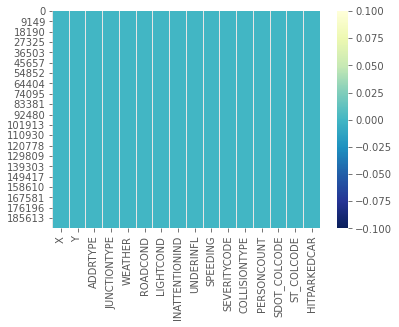

In [57]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [59]:
data_clean.isnull().sum()

X                 0
Y                 0
ADDRTYPE          0
JUNCTIONTYPE      0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
INATTENTIONIND    0
UNDERINFL         0
SPEEDING          0
SEVERITYCODE      0
COLLISIONTYPE     0
PERSONCOUNT       0
SDOT_COLCODE      0
ST_COLCODE        0
HITPARKEDCAR      0
dtype: int64

In [60]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

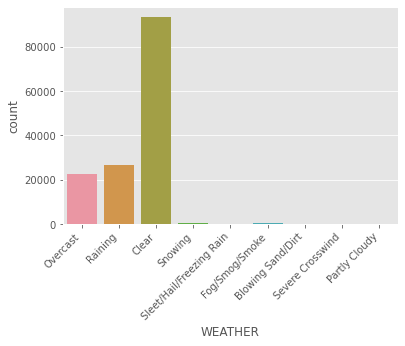

In [61]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

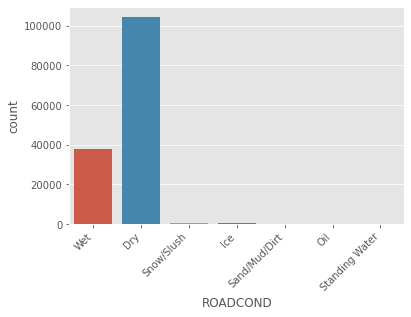

In [62]:
ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

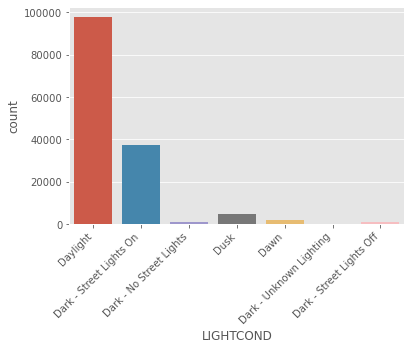

In [63]:
ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

In [64]:
data_clean.corr()

,X,Y,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,PERSONCOUNT,SDOT_COLCODE
X,1.000000,-0.157098,-0.022159,-0.024568,-0.007970,0.009060,0.013433,0.003487
Y,-0.157098,1.000000,0.012755,-0.002231,-0.006360,0.027797,-0.023651,0.013231
INATTENTIONIND,-0.022159,0.012755,1.000000,-0.015385,-0.041592,0.028906,0.063004,0.024697
UNDERINFL,-0.024568,-0.002231,-0.015385,1.000000,0.030392,0.020390,0.039869,0.014045
SPEEDING,-0.007970,-0.006360,-0.041592,0.030392,1.000000,0.032710,0.054409,0.002462
SEVERITYCODE,0.009060,0.027797,0.028906,0.020390,0.032710,1.000000,0.108546,0.223953
PERSONCOUNT,0.013433,-0.023651,0.063004,0.039869,0.054409,0.108546,1.000000,-0.060540
SDOT_COLCODE,0.003487,0.013231,0.024697,0.014045,0.002462,0.223953,-0.060540,1.000000


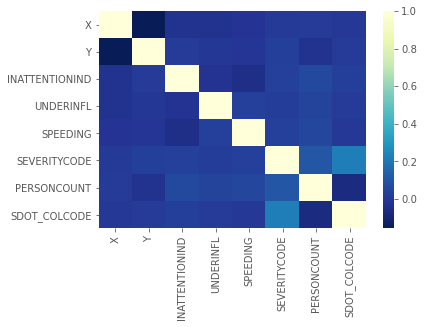

In [69]:
sns.heatmap(data_clean.corr(), cmap = 'YlGnBu_r')
plt.show()

In [70]:
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis = 1),
                      pd.get_dummies(data_clean['WEATHER']),
                      pd.get_dummies(data_clean['ROADCOND']),
                      pd.get_dummies(data_clean['LIGHTCOND'])],axis = 1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143747 entries, 0 to 194672
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   X                         143747 non-null  float64
 1   Y                         143747 non-null  float64
 2   ADDRTYPE                  143747 non-null  object 
 3   JUNCTIONTYPE              143747 non-null  object 
 4   INATTENTIONIND            143747 non-null  float64
 5   UNDERINFL                 143747 non-null  float64
 6   SPEEDING                  143747 non-null  float64
 7   SEVERITYCODE              143747 non-null  int64  
 8   COLLISIONTYPE             143747 non-null  object 
 9   PERSONCOUNT               143747 non-null  int64  
 10  SDOT_COLCODE              143747 non-null  int64  
 11  ST_COLCODE                143747 non-null  object 
 12  HITPARKEDCAR              143747 non-null  object 
 13  Blowing Sand/Dirt         143747 non-null  u

In [72]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [73]:
data_clean.head(5).T

,0,1,2,3,4
X,-122.285,-122.321,-122.376,-122.382,-122.312
Y,47.5574,47.6199,47.5438,47.5273,47.7085
ADDRTYPE,Block,Intersection,Block,Block,Intersection
JUNCTIONTYPE,Mid-Block (but intersection related),At Intersection (intersection related),Mid-Block (not related to intersection),Mid-Block (not related to intersection),At Intersection (intersection related)
INATTENTIONIND,0,0,0,1,0
UNDERINFL,0,0,0,0,0
SPEEDING,1,0,0,0,1
SEVERITYCODE,2,2,2,1,1
COLLISIONTYPE,Left Turn,Angles,Sideswipe,Parked Car,Left Turn
PERSONCOUNT,4,5,4,2,5


In [75]:
data_clean.corr()

,X,Y,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,PERSONCOUNT,SDOT_COLCODE,Blowing Sand/Dirt,Clear,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
X,1.000000,-0.157098,-0.022159,-0.024568,-0.007970,0.009060,0.013433,0.003487,0.000148,-0.003983,...,0.001060,-0.002735,0.008764,-0.006817,0.005653,-0.027889,-0.001193,-0.001384,0.025563,0.003328
Y,-0.157098,1.000000,0.012755,-0.002231,-0.006360,0.027797,-0.023651,0.013231,-0.000154,-0.005227,...,0.002408,0.000636,0.001957,-0.007995,-0.009028,0.002302,0.002678,-0.015396,0.001221,0.008581
INATTENTIONIND,-0.022159,0.012755,1.000000,-0.015385,-0.041592,0.028906,0.063004,0.024697,-0.004283,0.024914,...,-0.016788,0.003346,-0.026608,-0.010038,-0.004247,-0.058151,-0.002985,0.001633,0.060726,-0.010100
UNDERINFL,-0.024568,-0.002231,-0.015385,1.000000,0.030392,0.020390,0.039869,0.014045,0.000090,-0.004834,...,0.000274,-0.000521,0.010483,0.012956,0.015544,0.155213,-0.001030,-0.008030,-0.149247,0.001115
SPEEDING,-0.007970,-0.006360,-0.041592,0.030392,1.000000,0.032710,0.054409,0.002462,0.001288,-0.067832,...,0.057801,0.022491,0.072843,0.004946,0.004137,0.049645,-0.001259,0.010563,-0.049403,-0.003663
SEVERITYCODE,0.009060,0.027797,0.028906,0.020390,0.032710,1.000000,0.108546,0.223953,-0.002027,-0.005748,...,-0.022263,-0.001334,0.014109,-0.017383,-0.008686,-0.027101,0.002177,0.002750,0.028546,0.002099
PERSONCOUNT,0.013433,-0.023651,0.063004,0.039869,0.054409,0.108546,1.000000,-0.060540,-0.002436,-0.013414,...,-0.001950,-0.002485,0.018544,-0.008449,-0.002002,0.033679,-0.002873,-0.019030,-0.025636,0.001479
SDOT_COLCODE,0.003487,0.013231,0.024697,0.014045,0.002462,0.223953,-0.060540,1.000000,0.001224,0.012851,...,-0.005669,-0.000657,-0.015825,0.004852,-0.000765,0.001681,0.004540,0.010411,-0.005077,0.000318
Blowing Sand/Dirt,0.000148,-0.000154,-0.004283,0.000090,0.001288,-0.002027,-0.002436,0.001224,1.000000,-0.022422,...,0.018107,-0.000304,-0.003166,0.003605,-0.001294,0.002772,-0.000106,0.001763,-0.004090,0.001593
Clear,-0.003983,-0.005227,0.024914,-0.004834,-0.067832,-0.005748,-0.013414,0.012851,-0.022422,1.000000,...,-0.074106,-0.024343,-0.718862,-0.014609,-0.018818,-0.125270,-0.002023,-0.055233,0.149204,-0.031154


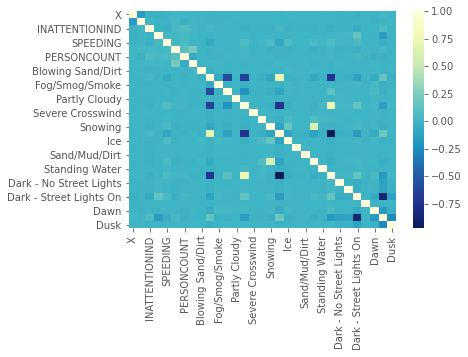

In [74]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [79]:
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)


ValueError: could not convert string to float: 'Block'